In [13]:

import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('data/heart.csv')

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data['old'] = data['age'].apply(lambda x: 1 if x>60 else 0)

In [17]:
data['old'].sum()

79

In [19]:
def trestbps(df):
    if df['age'] <= 20:
        if df['sex']==1:
            return 123
        else:
            return 116
    elif 20 < df['age'] < 31:
        if df['sex']==1:
            return 126
        else:
            return 120
    elif 30 < df['age'] < 41:
        if df['sex']==1:
            return 129
        else:
            return 127
    elif 40 < df['age'] < 51:
        if df['sex']==1:
            return 135
        else:
            return 137
    elif 50 < df['age'] < 61:
        if df['sex']==1:
            return 142
        else:
            return 144
    else:
        if df['sex']==1:
            return 142
        else:
            return 159

In [20]:
data['trestbps_mean'] = data.apply(lambda x: trestbps, axis=1)

In [21]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,<function trestbps at 0x0000028D2D081AF0>
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,<function trestbps at 0x0000028D2D081AF0>
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,<function trestbps at 0x0000028D2D081AF0>
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,<function trestbps at 0x0000028D2D081AF0>
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,<function trestbps at 0x0000028D2D081AF0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,<function trestbps at 0x0000028D2D081AF0>
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,<function trestbps at 0x0000028D2D081AF0>
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,<function trestbps at 0x0000028D2D081AF0>
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,<function trestbps at 0x0000028D2D081AF0>


In [24]:
data['sex'].iloc[300]

1

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    object 
dtypes: float64(1), int64(14), object(1)
memory usage: 38.0+ KB


In [26]:
data.nunique()

age               41
sex                2
cp                 4
trestbps          49
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 5
thal               4
target             2
old                2
trestbps_mean      1
dtype: int64

In [27]:
import category_encoders as ce

In [29]:
encoder = ce.OneHotEncoder(cols=['cp'])
type_bin = encoder.fit_transform(data['cp'])
data = pd.concat([data, type_bin], axis=1)

In [30]:
encoder = ce.OneHotEncoder(cols=['restecg'])
type_bin = encoder.fit_transform(data['restecg'])
data = pd.concat([data, type_bin], axis=1)

In [31]:
encoder = ce.OneHotEncoder(cols=['slope'])
type_bin = encoder.fit_transform(data['slope'])
data = pd.concat([data, type_bin], axis=1)

In [32]:
encoder = ce.OneHotEncoder(cols=['ca'])
type_bin = encoder.fit_transform(data['ca'])
data = pd.concat([data, type_bin], axis=1)

In [33]:
encoder = ce.OneHotEncoder(cols=['thal'])
type_bin = encoder.fit_transform(data['thal'])
data = pd.concat([data, type_bin], axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    object 
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

In [35]:
from sklearn import preprocessing

In [36]:
r_scaler = preprocessing.RobustScaler()
chol_r = r_scaler.fit_transform(data[['chol']])
data['chol_r'] = chol_r

In [39]:
round(data['chol_r'].std(), 6)

0.816232

In [40]:
import seaborn as sns

C:\Users\Anna\AppData\Local\Temp\ipykernel_17840\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

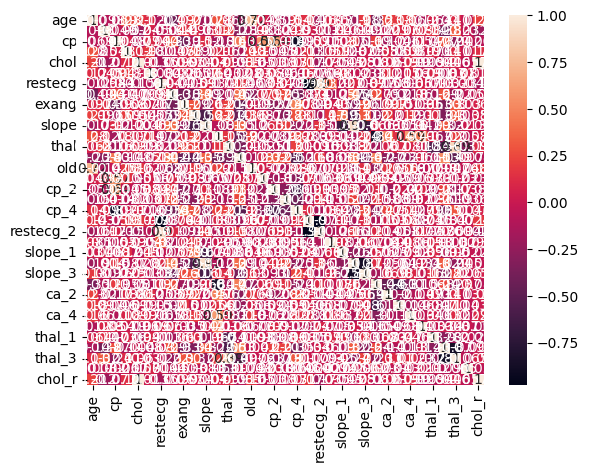

In [41]:
sns.heatmap(data.corr(), annot=True)

In [42]:
import matplotlib.pyplot as plt

C:\Users\Anna\AppData\Local\Temp\ipykernel_17840\1803289335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

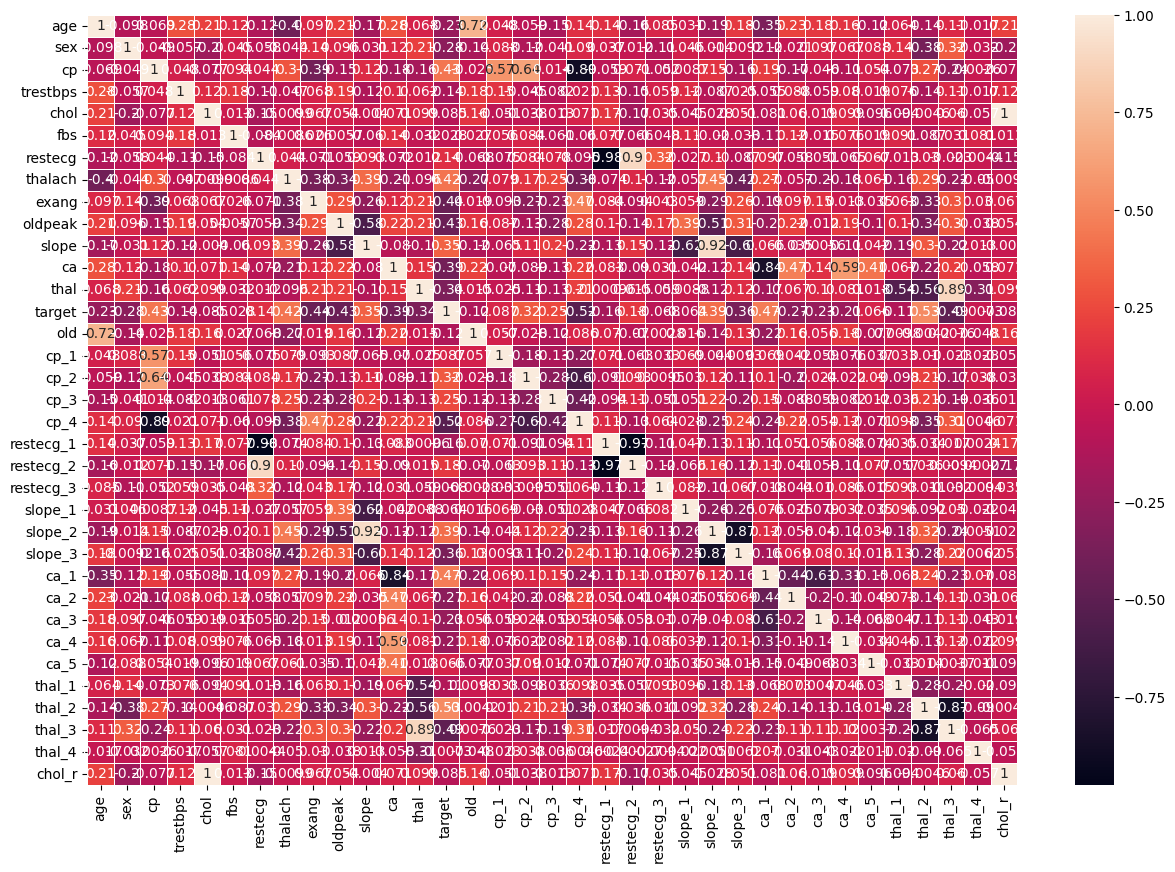

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)